In [181]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

from sklearn.ensemble import RandomForestClassifier

from math import sqrt

from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
#from keras.datasets import mnist

from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [182]:
currency_list = [#'USDCHF10080',
                 #'GBPUSD10080', 'EURUSD10080', 
    #'USDJPY10080', 
    #'USDCAD10080', 
    #'AUDUSD10080', 
    #'NZDUSD10080',
                 #'GBPCHF10080',
    #'EURCHF10080', 
    #'CHFJPY10080', 
    #'CADCHF10080',
    #'AUDCHF10080', 
    #'NZDCHF10080', 
    'EURGBP10080',
             #   'GBPCAD10080',
     #'GBPAUD10080', 
    #'EURJPY10080',
    #'EURCAD10080',
    #'EURAUD10080',
    #'EURNZD10080',
    #'CADJPY10080', 
    #'AUDJPY10080',
    #'NZDJPY10080',
    #'AUDCAD10080', 
    #'NZDCAD10080', 
                #'AUDNZD10080'
                ]



# for q in currency_list:
    
#     errors = []
    
#     for x in range(5):

#         currency = q.replace('10080','')

#         data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
#         #data = data.head(695)


#         X = data.drop(columns=['Unnamed: 0', 
#                                'date_start',  'nextweek_class',


#                               ])



#         y = data['nextweek_class']

#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 )



#         lnr= LinearRegression()
#         lnr.fit(X_train, y_train)
#         y_predict = lnr.predict(X_test)
        
        
#         error = sqrt(mean_squared_error(y_test, y_pred))
#         errors.append(error)
       
        
#     average_error = sum(errors)/len(errors)
       
#     print(q + " Linear regression Average " + str(average_error))
    
    
   


(725, 2, 1) (725,)
Model: "sequential_524"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1566 (LSTM)             (None, 2, 100)            40800     
_________________________________________________________________
lstm_1567 (LSTM)             (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
17/17 [==============================] - 6s 91ms/step - loss: 181.5608 - val_loss: 165.5088
Epoch 2/5
17/17 [==============================] - 0s 25ms/step - loss: 181.2695 - val_loss: 165.1009
Epoch 3/5
17/17 [==============================] - 0s 24ms/step - loss: 181.0640 - val_loss: 164.7496
Epoch 4/5
17/17 [==============================] - 0s 25ms/step - loss: 180.8421 - val_loss: 164.6337
Epoch 5/5
4/4 [==============================] - 0s 10ms/step - loss: 185.0566

Epoch 3/5
17/17 [==============================] - 0s 19ms/step - loss: 174.3730 - val_loss: 197.0051
Epoch 4/5
17/17 [==============================] - 0s 22ms/step - loss: 174.2861 - val_loss: 196.4530
Epoch 5/5
4/4 [==============================] - 0s 8ms/step - loss: 189.5739
(725, 2, 1) (725,)
Model: "sequential_531"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1580 (LSTM)             (None, 2, 100)            40800     
_________________________________________________________________
lstm_1581 (LSTM)             (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
17/17 [==============================] - 6s 86ms/step - loss: 181.4422 - val_loss: 177.2162
Epoch 2/5
17/17 [==============================] - 0s 20ms/step - loss: 181.2105 - val_loss: 176.9933


17/17 [==============================] - 7s 85ms/step - loss: 177.0037 - val_loss: 142.2591
Epoch 2/5
17/17 [==============================] - 0s 19ms/step - loss: 176.7830 - val_loss: 142.2843
Epoch 3/5
17/17 [==============================] - 0s 19ms/step - loss: 176.6010 - val_loss: 142.2996
Epoch 4/5
17/17 [==============================] - 0s 19ms/step - loss: 176.4744 - val_loss: 142.3468
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 223.9868
(725, 2, 1) (725,)
Model: "sequential_538"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1594 (LSTM)             (None, 2, 100)            40800     
_________________________________________________________________
lstm_1595 (LSTM)             (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


17/17 [==============================] - 7s 87ms/step - loss: 176.9329 - val_loss: 166.4683
Epoch 2/5
17/17 [==============================] - 0s 19ms/step - loss: 176.6790 - val_loss: 166.3804
Epoch 3/5
17/17 [==============================] - 0s 19ms/step - loss: 176.4852 - val_loss: 166.3665
Epoch 4/5
17/17 [==============================] - 0s 19ms/step - loss: 176.2327 - val_loss: 166.3419
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 205.8508
(725, 2, 1) (725,)
Model: "sequential_545"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1608 (LSTM)             (None, 2, 100)            40800     
_________________________________________________________________
lstm_1609 (LSTM)             (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


17/17 [==============================] - 7s 84ms/step - loss: 181.5054 - val_loss: 201.5370
Epoch 2/5
17/17 [==============================] - 0s 19ms/step - loss: 181.2892 - val_loss: 201.2124
Epoch 3/5
17/17 [==============================] - 0s 20ms/step - loss: 181.1504 - val_loss: 200.9818
Epoch 4/5
17/17 [==============================] - 0s 20ms/step - loss: 181.0054 - val_loss: 200.6430
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 152.8738
(725, 2, 1) (725,)
Model: "sequential_552"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1622 (LSTM)             (None, 2, 100)            40800     
_________________________________________________________________
lstm_1623 (LSTM)             (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


17/17 [==============================] - 6s 84ms/step - loss: 179.4231 - val_loss: 165.1582
Epoch 2/5
17/17 [==============================] - 0s 18ms/step - loss: 179.2004 - val_loss: 164.9034
Epoch 3/5
17/17 [==============================] - 0s 18ms/step - loss: 179.0796 - val_loss: 164.7262
Epoch 4/5
17/17 [==============================] - 0s 18ms/step - loss: 178.7920 - val_loss: 164.5537
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 194.4856
(725, 2, 1) (725,)
Model: "sequential_559"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1636 (LSTM)             (None, 2, 100)            40800     
_________________________________________________________________
lstm_1637 (LSTM)             (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


17/17 [==============================] - 6s 82ms/step - loss: 184.1844 - val_loss: 162.0855
Epoch 2/5
17/17 [==============================] - 0s 18ms/step - loss: 183.9471 - val_loss: 162.0814
Epoch 3/5
17/17 [==============================] - 0s 18ms/step - loss: 183.8134 - val_loss: 162.0911
Epoch 4/5
17/17 [==============================] - 0s 18ms/step - loss: 183.6493 - val_loss: 162.1399
Epoch 5/5
4/4 [==============================] - 0s 6ms/step - loss: 173.6037
(725, 2, 1) (725,)
Model: "sequential_566"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1650 (LSTM)             (None, 2, 100)            40800     
_________________________________________________________________
lstm_1651 (LSTM)             (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


17/17 [==============================] - 6s 83ms/step - loss: 186.2153 - val_loss: 165.4333
Epoch 2/5
17/17 [==============================] - 0s 18ms/step - loss: 186.0311 - val_loss: 165.6256
Epoch 3/5
17/17 [==============================] - 0s 18ms/step - loss: 185.8857 - val_loss: 165.7052
Epoch 4/5
17/17 [==============================] - 0s 18ms/step - loss: 185.8287 - val_loss: 165.8963
Epoch 5/5
4/4 [==============================] - 0s 7ms/step - loss: 159.3513
(725, 2, 1) (725,)
Model: "sequential_573"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1664 (LSTM)             (None, 2, 100)            40800     
_________________________________________________________________
lstm_1665 (LSTM)             (None, 1)                 408       
Total params: 41,208
Trainable params: 41,208
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5


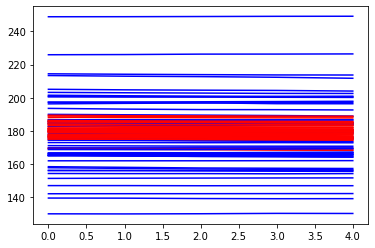

In [183]:
for q in currency_list:
    
    
    
    sequences = [2]
    
    all_sequence_result = []
        
    for m in sequences:
    
        errors = []
        for x in range(50):

            currency = q.replace('10080','')

            data = pd.read_excel('files/currency_training_data/' + currency +'_combine_data_dataframe.xlsx', sheet_name=0)
            #data = data.head(695)


            X = data.drop(columns=['Unnamed: 0', 
                                   'date_start',  'nextweek_class',


                                  ])



            y = data['nextweek_class']




            #print(X.shape)


            # after scaling the df, resulted in "scaled_dataset"





            result = []
            # for loop will walk for each of the 1500 rows
            for i in range(0,len(X)):
                # every group must have the same length, so if current loop position i + number 
                # of sequences is higher than df length, breaks
                if i+m <= len(X):
                    # this will add into the list as [[R1a,R1b...R1t],[R2a,R2b...R2t],...[R5a,R5b...R5t]]
                    result.append(X[i:i+m].values)
            # Converting to array + keras takes float32 better than 64
            train_x = np.array(result)
            #train_x  = train_x.astype('float32')
            # making the y into same length as X
            train_y = np.array(y.head(len(train_x)).values)

            print(train_x.shape, train_y.shape)
            #print(train_x[len(train_x)-10])
            #print(train_y[len(train_x)-10])

            X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.15 )

            X_train, X_val, y_train, y_val = train_test_split( X_train, y_train, test_size = 0.15 )



            #Initializing the classifier Network
            classifier = Sequential()

            #Adding the input LSTM network layer
            #classifier.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]), return_sequences=True))
            classifier.add(LSTM(100, input_shape=(train_x.shape[1:]), return_sequences=True))
            #classifier.add(LSTM(100,  return_sequences=True),)
            #classifier.add(LSTM(100,  return_sequences=True), )
            #classifier.add(LSTM(100,  return_sequences=True))

            #classifier.add(Dense(units = 1))
            classifier.add(LSTM(1,  return_sequences=False))
            #classifier.add(Dropout(0.2))
            #Adding a second LSTM network layer

            #classifier.add(LSTM(128))
            #Adding a dense hidden layer
            #classifier.add(Dense(64, activation='relu'))
            #classifier.add(Dropout(0.2))

            #Adding the output layer
            #classifier.add(Dense(35, activation='softmax'))

            #Compiling the network
            classifier.compile( loss='mean_squared_error',
                            optimizer=Adam(learning_rate=0.001, decay=1e-6),
                             )

            print(classifier.summary())

            #Fitting the data to the model
            history = classifier.fit(X_train,
                        y_train,
                        epochs=5,
                        validation_data=(X_val, y_val))        

            val_loss  = classifier.evaluate(X_test, y_test)
            error = sqrt(val_loss)
            errors.append(error)
            plt.plot(history.history['loss'],'red')
            plt.plot(history.history['val_loss'], 'blue')

        average_error = sum(errors)/len(errors)
        print(errors)
        print(q , "------------------------ RNN " , average_error)
        all_sequence_result.append(str(m)+" sequence" )
        all_sequence_result.append(average_error)


In [184]:
print(all_sequence_result)   


['2 sequence', 13.317716398451253]
